<a href="https://colab.research.google.com/github/shima2920/Kaggle/blob/main/YouTube%E5%8B%95%E7%94%BB%E8%A6%96%E8%81%B4%E5%9B%9E%E6%95%B0%E4%BA%88%E6%B8%AC_multiple_regressor_comparison_20210818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [703]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder#Label Encoding
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
#import optuna.integration.lightgbm as lgb #LightLGBのハイパーパラメータチューニングモジュールであるOptunaをimport
import lightgbm as lgb_original
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import xgboost as XGBClassifier
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout #Dense : ニューラルネットの層を定義？
from keras.models import Sequential# 複雑なニューラルネットワークモデルを簡略化するためのモデルの一つであるSequentialモデル
from sklearn.preprocessing import StandardScaler #標準化



#Validation
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold


#イテレータ, ループ処理を実行してくれる
import itertools

pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_columns', 1000)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder#Label Encoding
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
#import optuna.integration.lightgbm as lgb #LightLGBのハイパーパラメータチューニングモジュールであるOptunaをimport
import lightgbm as lgb_original
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import xgboost as XGBClassifier
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout #Dense : ニューラルネットの層を定義？
from keras.models import Sequential# 複雑なニューラルネットワークモデルを簡略化するためのモデルの一つであるSequentialモデル
from sklearn.preprocessing import StandardScaler #標準化



#Validation
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold


#イテレータ, ループ処理を実行してくれる
import itertools

pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_columns', 1000)
%matplotlib inline

#PROBSPACE Competition

https://prob.space/competitions/youtube-view-count

参考：https://www.kaggle.com/katayu810/youtube-rf-xgb-lgb

In [704]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [705]:
train.shape

(19720, 17)

In [706]:
test.shape

(29582, 16)

# Concat the data

In [707]:
#train data と test data を結合
train_mid = train.copy()
test_mid = test.copy()
train_mid['train_or_test'] = 'train' #学習データフラグ
test_mid['train_or_test'] = 'test' #テストデータフラグ
test_mid['y'] = 0 #テストにSurvivedカラムを仮置き(target column のデータを仮置き)

alldata = pd.concat(
    [
        train_mid,
        test_mid
    ],
    sort=False,
    axis=0
).reset_index(drop=True)
print('The size of the alldata data:' + str(alldata.shape))

The size of the alldata data:(49302, 18)


# Check the data

In [708]:
alldata.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y,train_or_test
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09T05:50:33.000Z,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,20.01.02,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,False,False,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,29229,train
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23T03:00:09.000Z,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,20.08.02,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,False,False,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,730280,train
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26T13:54:09.000Z,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,20.14.01,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,False,False,Beat-tribe cup finalhttp://ameblo.jp/siropai/,80667,train
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15T02:38:43.000Z,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,19.22.12,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,False,False,I look so bad but look at me!,34826,train
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09T09:52:47.000Z,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,20.08.01,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,False,False,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,172727,train


In [709]:
 #!pip install -U pandas-profiling

In [710]:
#import pandas_profiling
#alldata.profile_report()

# EDA

# Check missing value

In [711]:
#alldata
total = alldata.isnull().sum().sort_values(ascending=False)
percent = ((alldata.isnull().sum()/alldata.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(434)

,Total,Percent
description,790,1.602369
tags,1,0.002028
collection_date,0,0.000000
video_id,0,0.000000
title,0,0.000000
publishedAt,0,0.000000
channelId,0,0.000000
channelTitle,0,0.000000
categoryId,0,0.000000
train_or_test,0,0.000000


## First, take a look at the correlation.

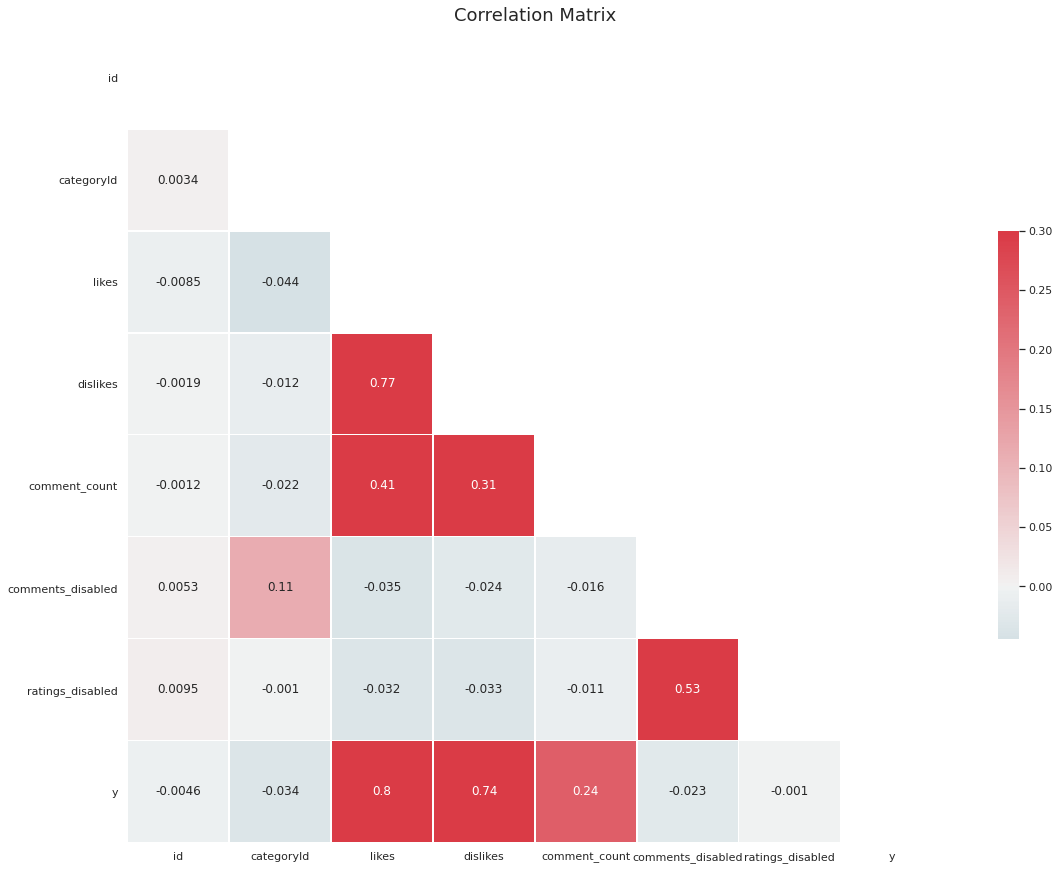

In [712]:
#correlation matrix
sns.set(style="white")
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

#Preprocessing

# Target Value "y"

In [713]:
#各IDに所属しているyの「平均値、最大値、最小値、標準偏差、個数」
mean_ = train[["categoryId", "y"]].groupby("categoryId").mean().reset_index().rename({"y":"mean"}, axis=1)
max_ = train[["categoryId", "y"]].groupby("categoryId").max().reset_index().rename({"y":"max"}, axis=1)
min_ = train[["categoryId", "y"]].groupby("categoryId").min().reset_index().rename({"y":"min"}, axis=1)
std_ = train[["categoryId", "y"]].groupby("categoryId").std().reset_index().rename({"y":"std"}, axis=1)
count_ = train[["categoryId", "y"]].groupby("categoryId").count().reset_index().rename({"y":"count"}, axis=1)

#各IDの分位点
q1_ = train[["categoryId", "y"]].groupby("categoryId").quantile(0.1).reset_index().rename({"y":"q1"}, axis=1)
q25_ = train[["categoryId", "y"]].groupby("categoryId").quantile(0.25).reset_index().rename({"y":"q25"}, axis=1)
q5_ = train[["categoryId", "y"]].groupby("categoryId").quantile(0.5).reset_index().rename({"y":"q5"}, axis=1)
q75_ = train[["categoryId", "y"]].groupby("categoryId").quantile(0.75).reset_index().rename({"y":"q75"}, axis=1)
q9_ = train[["categoryId", "y"]].groupby("categoryId").quantile(0.9).reset_index().rename({"y":"q9"}, axis=1)

In [714]:
#最初に求めた奴の結合
alldata = alldata.merge(mean_, how='left', on=["categoryId"])
alldata = alldata.merge(max_, how='left', on=["categoryId"])
alldata = alldata.merge(min_, how='left', on=["categoryId"])
alldata = alldata.merge(std_, how='left', on=["categoryId"])
  #alldata = df.merge(count_, how='left', on=["categoryId"])
alldata = alldata.merge(q1_, how='left', on=["categoryId"])
alldata = alldata.merge(q25_, how='left', on=["categoryId"])
alldata = alldata.merge(q5_, how='left', on=["categoryId"])
alldata = alldata.merge(q75_, how='left', on=["categoryId"])
alldata = alldata.merge(q9_, how='left', on=["categoryId"])

In [715]:
alldata.tail()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y,train_or_test,mean,max,min,std,q1,q25,q5,q75,q9
49297,29578,8_ZeZZbLCRE,?パパママを助ける！赤ちゃんが泣き止んで喜ぶ歌メドレー | 赤ちゃんが喜ぶ英語の歌 | 子供...,2017-05-21T09:00:01.000Z,UCwYFFFgr4wl5Oby8gBbAZzg,BabyBus - 子供の歌 - 子どもの動画,27,20.09.02,BabyBus|babybus|子供の歌|童謡アニメ|子供の動画|おもちゃ|panda|パン...,1277,757,8,https://i.ytimg.com/vi/8_ZeZZbLCRE/default.jpg,False,False,YouTubeからBabyBus(ベビーバス)のチャンネル登録をすれば、もっと多くの動画が見...,0,test,6.489862e+06,2.142560e+09,3.0,7.042251e+07,14203.4,59834.00,226481.0,1091030.00,6051641.2
49298,29579,Ic-hwvqyl1s,レミーのおいしいレストラン Ratatouille Trailer 予告編（Preview),2007-06-30T11:54:11.000Z,UCfQOAn65HJi5XqILyZYdZ-w,BurnandCrop,1,20.07.01,レミーのおいしいレストラン|Ratatouille|Pixar,267,13,30,https://i.ytimg.com/vi/Ic-hwvqyl1s/default.jpg,False,False,This was first shown on remy.jp on June 29th,0,test,2.051009e+06,3.203666e+08,46.0,9.116787e+06,19436.0,95998.00,433358.0,1448922.50,4055324.0
49299,29580,lzSkw_sQDUw,スタンドアップパドルボード(SUP) ウィロー (TM)| コールマン,2014-07-14T03:39:26.000Z,UC7MRkV4C2hrl9oiPdWe9hWA,コールマン ジャパン 公式,17,20.08.02,sevylor|SUP|Stand|up|paddle|スタンドアップパドルサーフィン|コー...,7,0,0,https://i.ytimg.com/vi/lzSkw_sQDUw/default.jpg,False,False,これからSUPデビューを飾る人。子どもをボードに乗せてゆったりと楽しみたい人。高い浮力と、安...,0,test,7.169933e+05,4.032124e+07,31.0,2.250973e+06,14503.8,55524.00,172517.0,613207.00,1474518.4
49300,29581,SUN1wGXAd3k,ブルーレイ&DVD『LEGORスクービー・ドゥー：モンスターズ・ハリウッド』7月20日リリース,2016-07-15T07:43:43.000Z,UCSrwpEM8lBM4jR5YoKX3XOQ,ワーナー ブラザース 公式チャンネル,1,20.09.02,[none],136,39,1,https://i.ytimg.com/vi/SUN1wGXAd3k/default.jpg,False,False,NaN,0,test,2.051009e+06,3.203666e+08,46.0,9.116787e+06,19436.0,95998.00,433358.0,1448922.50,4055324.0
49301,29582,hMO79XWfFJ8,【マインクラフト】アイアンゴーレムトラップ作って鉄を大量ゲットするぞ！【ヒカキンのマイクラ実...,2016-09-14T08:51:07.000Z,UCX1xppLvuj03ubLio8jslyA,HikakinGames,20,20.09.02,hikakingames|hikakin|beatbox|game|gameplay|ヒカキ...,26967,3649,3272,https://i.ytimg.com/vi/hMO79XWfFJ8/default.jpg,False,False,◆参考にさせて頂いた動画https://www.youtube.com/watch?v=JI...,0,test,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6


## split the "publishedAt" and "collection_date" into Year, Month, Day, weekdays, Hour, Minutes.



In [716]:
alldata["publishedAt"] = pd.to_datetime(alldata["publishedAt"])
alldata["publishedAt_Year"] = alldata["publishedAt"].apply(lambda x:x.year)
alldata["publishedAt_Month"] = alldata["publishedAt"].apply(lambda x:x.month)
alldata["publishedAt_Day"] = alldata["publishedAt"].apply(lambda x:x.day)
alldata['publishedAt_weekday'] = alldata["publishedAt"].apply(lambda x: x.weekday())
alldata["publishedAt_hour"] = alldata["publishedAt"].apply(lambda x:x.hour)
alldata["publishedAt_minute"] = alldata["publishedAt"].apply(lambda x:x.minute)
#alldata = alldata.drop(['publishedAt'], axis = 1)

In [717]:
alldata["collection_date_year"] = alldata["collection_date"].apply(lambda x: int(x[0:2]))
alldata["collection_date_year"] = alldata["collection_date_year"]
alldata["collection_date_day"] = alldata["collection_date"].apply(lambda x: int(x[3:5]))
alldata["collection_date_month"] = alldata["collection_date"].apply(lambda x: int(x[6:8]))

In [718]:
#"collection_date"をdatetime型に変換
alldata["collection_date"] = pd.to_datetime("20"+alldata["collection_date"], format="%Y.%d.%m", utc=True)

In [719]:
alldata.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y,train_or_test,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09 05:50:33+00:00,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,2020-02-01 00:00:00+00:00,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,False,False,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,29229,train,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6,2011,1,9,6,5,50,20,1,2
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23 03:00:09+00:00,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,2020-02-08 00:00:00+00:00,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,False,False,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,730280,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2012,7,23,0,3,0,20,8,2
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26 13:54:09+00:00,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,2020-01-14 00:00:00+00:00,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,False,False,Beat-tribe cup finalhttp://ameblo.jp/siropai/,80667,train,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.00,358451.0,1416473.00,4313006.0,2007,7,26,3,13,54,20,14,1
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15 02:38:43+00:00,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,2019-12-22 00:00:00+00:00,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,False,False,I look so bad but look at me!,34826,train,1.352693e+06,4.178697e+07,8.0,3.811351e+06,3979.8,38162.00,198158.0,942131.50,3289791.0,2005,5,15,6,2,38,19,22,12
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09 09:52:47+00:00,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,2020-01-08 00:00:00+00:00,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,False,False,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,172727,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2007,9,9,6,9,52,20,8,1


## make the delta value between publishedAt and collection_date

In [720]:
#delta
#公開日からデータ収集日までの期間
alldata["delta"] = (alldata["collection_date"] - alldata["publishedAt"]).apply(lambda x: x.days)
alldata["logdelta"] = np.log(alldata["delta"])
alldata["sqrtdelta"] = np.sqrt(alldata["delta"])

#"datetime" と "df 内の datetime の最小値"との差分(delta)
alldata["published_delta"] = (alldata["publishedAt"] - alldata["publishedAt"].min()).apply(lambda x: x.days)
alldata["collection_delta"] = (alldata["collection_date"] - alldata["collection_date"].min()).apply(lambda x: x.days)

In [721]:
alldata.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y,train_or_test,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month,delta,logdelta,sqrtdelta,published_delta,collection_delta
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09 05:50:33+00:00,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,2020-02-01 00:00:00+00:00,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,False,False,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,29229,train,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6,2011,1,9,6,5,50,20,1,2,3309,8.104401,57.523908,2086,41
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23 03:00:09+00:00,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,2020-02-08 00:00:00+00:00,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,False,False,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,730280,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2012,7,23,0,3,0,20,8,2,2755,7.921173,52.488094,2646,48
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26 13:54:09+00:00,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,2020-01-14 00:00:00+00:00,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,False,False,Beat-tribe cup finalhttp://ameblo.jp/siropai/,80667,train,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.00,358451.0,1416473.00,4313006.0,2007,7,26,3,13,54,20,14,1,4554,8.423761,67.483331,823,23
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15 02:38:43+00:00,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,2019-12-22 00:00:00+00:00,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,False,False,I look so bad but look at me!,34826,train,1.352693e+06,4.178697e+07,8.0,3.811351e+06,3979.8,38162.00,198158.0,942131.50,3289791.0,2005,5,15,6,2,38,19,22,12,5333,8.581669,73.027392,20,0
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09 09:52:47+00:00,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,2020-01-08 00:00:00+00:00,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,False,False,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,172727,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2007,9,9,6,9,52,20,8,1,4503,8.412499,67.104396,868,17


## Tag

In [722]:
#cover the missing value as none.
alldata["tags"].fillna("[none]", inplace = True)

#tagの個数をカウント
alldata["num_tags"] = alldata["tags"].astype(str).apply(lambda x: len(x.split("|")))

#文字数
alldata["length_tags"] = alldata["tags"].astype(str).apply(lambda x: len(x))

In [723]:
alldata.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y,train_or_test,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month,delta,logdelta,sqrtdelta,published_delta,collection_delta,num_tags,length_tags
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09 05:50:33+00:00,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,2020-02-01 00:00:00+00:00,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,False,False,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,29229,train,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6,2011,1,9,6,5,50,20,1,2,3309,8.104401,57.523908,2086,41,48,315
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23 03:00:09+00:00,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,2020-02-08 00:00:00+00:00,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,False,False,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,730280,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2012,7,23,0,3,0,20,8,2,2755,7.921173,52.488094,2646,48,19,129
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26 13:54:09+00:00,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,2020-01-14 00:00:00+00:00,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,False,False,Beat-tribe cup finalhttp://ameblo.jp/siropai/,80667,train,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.00,358451.0,1416473.00,4313006.0,2007,7,26,3,13,54,20,14,1,4554,8.423761,67.483331,823,23,9,52
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15 02:38:43+00:00,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,2019-12-22 00:00:00+00:00,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,False,False,I look so bad but look at me!,34826,train,1.352693e+06,4.178697e+07,8.0,3.811351e+06,3979.8,38162.00,198158.0,942131.50,3289791.0,2005,5,15,6,2,38,19,22,12,5333,8.581669,73.027392,20,0,1,6
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09 09:52:47+00:00,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,2020-01-08 00:00:00+00:00,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,False,False,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,172727,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2007,9,9,6,9,52,20,8,1,4503,8.412499,67.104396,868,17,12,83


# comments_disabled, ratings_disabled を bool から int に変換 

In [724]:
#型をbool方からintに変換
alldata["comments_disabled"] = alldata["comments_disabled"].astype(np.int16)
alldata["ratings_disabled"] = alldata["ratings_disabled"].astype(np.int16)

# description 

In [725]:
#欠損値は空白は埋める
alldata["description"].fillna(" ", inplace=True)

#全てを小文字に変換して、httpをカウント
alldata["ishttp_in_dis"] = alldata["description"].apply(lambda x: x.lower().count("http"))

#descriptionの長さ
alldata["len_description"] = alldata["description"].apply(lambda x: len(x))

# Title

In [726]:
alldata["title"].fillna(" ", inplace=True)
#欠損値がある場合空白で埋める

alldata["len_title"] = alldata["title"].apply(lambda x: len(x))
#タイトルの長さ

In [727]:
# official が含まれているか
alldata["official_title"] = alldata["title"].apply(lambda x: "official" in x.lower())
#公式 が含まれているか
alldata["koushiki_title"] = alldata["title"].apply(lambda x: "公式" in x.lower())

In [728]:
alldata.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y,train_or_test,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month,delta,logdelta,sqrtdelta,published_delta,collection_delta,num_tags,length_tags,ishttp_in_dis,len_description,len_title,official_title,koushiki_title
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09 05:50:33+00:00,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,2020-02-01 00:00:00+00:00,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,0,0,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,29229,train,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6,2011,1,9,6,5,50,20,1,2,3309,8.104401,57.523908,2086,41,48,315,0,61,42,False,False
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23 03:00:09+00:00,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,2020-02-08 00:00:00+00:00,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,0,0,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,730280,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2012,7,23,0,3,0,20,8,2,2755,7.921173,52.488094,2646,48,19,129,1,261,35,True,False
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26 13:54:09+00:00,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,2020-01-14 00:00:00+00:00,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,0,0,Beat-tribe cup finalhttp://ameblo.jp/siropai/,80667,train,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.00,358451.0,1416473.00,4313006.0,2007,7,26,3,13,54,20,14,1,4554,8.423761,67.483331,823,23,9,52,1,45,22,False,False
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15 02:38:43+00:00,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,2019-12-22 00:00:00+00:00,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,0,0,I look so bad but look at me!,34826,train,1.352693e+06,4.178697e+07,8.0,3.811351e+06,3979.8,38162.00,198158.0,942131.50,3289791.0,2005,5,15,6,2,38,19,22,12,5333,8.581669,73.027392,20,0,1,6,0,30,20,False,False
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09 09:52:47+00:00,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,2020-01-08 00:00:00+00:00,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,0,0,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,172727,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2007,9,9,6,9,52,20,8,1,4503,8.412499,67.104396,868,17,12,83,2,138,13,False,False


# Channel Title

In [729]:
# official が含まれているか
alldata["official_channelTitle"] = alldata["channelTitle"].apply(lambda x: "official" in x.lower())
#公式 が含まれているか
alldata["koushiki_channelTitle"] = alldata["channelTitle"].apply(lambda x: "公式" in x.lower())

# Music

In [730]:
# music が含まれているか
alldata["music_title"] = alldata["title"].apply(lambda x: "music" in x.lower())
alldata["music_tags"] = alldata["tags"].apply(lambda x: "music" in x.lower())
alldata["music_description"] = alldata["description"].apply(lambda x: "music" in x.lower())

In [731]:
alldata.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y,train_or_test,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month,delta,logdelta,sqrtdelta,published_delta,collection_delta,num_tags,length_tags,ishttp_in_dis,len_description,len_title,official_title,koushiki_title,official_channelTitle,koushiki_channelTitle,music_title,music_tags,music_description
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09 05:50:33+00:00,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,2020-02-01 00:00:00+00:00,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,0,0,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,29229,train,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6,2011,1,9,6,5,50,20,1,2,3309,8.104401,57.523908,2086,41,48,315,0,61,42,False,False,False,False,False,True,False
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23 03:00:09+00:00,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,2020-02-08 00:00:00+00:00,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,0,0,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,730280,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2012,7,23,0,3,0,20,8,2,2755,7.921173,52.488094,2646,48,19,129,1,261,35,True,False,True,False,True,False,False
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26 13:54:09+00:00,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,2020-01-14 00:00:00+00:00,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,0,0,Beat-tribe cup finalhttp://ameblo.jp/siropai/,80667,train,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.00,358451.0,1416473.00,4313006.0,2007,7,26,3,13,54,20,14,1,4554,8.423761,67.483331,823,23,9,52,1,45,22,False,False,False,False,False,False,False
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15 02:38:43+00:00,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,2019-12-22 00:00:00+00:00,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,0,0,I look so bad but look at me!,34826,train,1.352693e+06,4.178697e+07,8.0,3.811351e+06,3979.8,38162.00,198158.0,942131.50,3289791.0,2005,5,15,6,2,38,19,22,12,5333,8.581669,73.027392,20,0,1,6,0,30,20,False,False,False,False,False,False,False
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09 09:52:47+00:00,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,2020-01-08 00:00:00+00:00,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,0,0,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,172727,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2007,9,9,6,9,52,20,8,1,4503,8.412499,67.104396,868,17,12,83,2,138,13,False,False,False,False,False,False,False


# remove the unnecessary columns.

In [732]:
alldata = alldata.drop(['id','video_id','title','publishedAt','channelId','channelTitle','collection_date','channelId','tags','thumbnail_link','description'], axis = 1)

In [733]:
alldata.head()

,categoryId,likes,dislikes,comment_count,comments_disabled,ratings_disabled,y,train_or_test,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month,delta,logdelta,sqrtdelta,published_delta,collection_delta,num_tags,length_tags,ishttp_in_dis,len_description,len_title,official_title,koushiki_title,official_channelTitle,koushiki_channelTitle,music_title,music_tags,music_description
0,20,114,0,7,0,0,29229,train,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6,2011,1,9,6,5,50,20,1,2,3309,8.104401,57.523908,2086,41,48,315,0,61,42,False,False,False,False,False,True,False
1,10,2885,50,111,0,0,730280,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2012,7,23,0,3,0,20,8,2,2755,7.921173,52.488094,2646,48,19,129,1,261,35,True,False,True,False,True,False,False
2,24,133,17,14,0,0,80667,train,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.00,358451.0,1416473.00,4313006.0,2007,7,26,3,13,54,20,14,1,4554,8.423761,67.483331,823,23,9,52,1,45,22,False,False,False,False,False,False,False
3,22,287,51,173,0,0,34826,train,1.352693e+06,4.178697e+07,8.0,3.811351e+06,3979.8,38162.00,198158.0,942131.50,3289791.0,2005,5,15,6,2,38,19,22,12,5333,8.581669,73.027392,20,0,1,6,0,30,20,False,False,False,False,False,False,False
4,10,178,6,17,0,0,172727,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2007,9,9,6,9,52,20,8,1,4503,8.412499,67.104396,868,17,12,83,2,138,13,False,False,False,False,False,False,False


#log y

In [734]:
alldata["y"] = np.log1p(alldata["y"])
alldata.head()

,categoryId,likes,dislikes,comment_count,comments_disabled,ratings_disabled,y,train_or_test,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month,delta,logdelta,sqrtdelta,published_delta,collection_delta,num_tags,length_tags,ishttp_in_dis,len_description,len_title,official_title,koushiki_title,official_channelTitle,koushiki_channelTitle,music_title,music_tags,music_description
0,20,114,0,7,0,0,10.282951,train,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6,2011,1,9,6,5,50,20,1,2,3309,8.104401,57.523908,2086,41,48,315,0,61,42,False,False,False,False,False,True,False
1,10,2885,50,111,0,0,13.501185,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2012,7,23,0,3,0,20,8,2,2755,7.921173,52.488094,2646,48,19,129,1,261,35,True,False,True,False,True,False,False
2,24,133,17,14,0,0,11.298097,train,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.00,358451.0,1416473.00,4313006.0,2007,7,26,3,13,54,20,14,1,4554,8.423761,67.483331,823,23,9,52,1,45,22,False,False,False,False,False,False,False
3,22,287,51,173,0,0,10.458148,train,1.352693e+06,4.178697e+07,8.0,3.811351e+06,3979.8,38162.00,198158.0,942131.50,3289791.0,2005,5,15,6,2,38,19,22,12,5333,8.581669,73.027392,20,0,1,6,0,30,20,False,False,False,False,False,False,False
4,10,178,6,17,0,0,12.059473,train,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2007,9,9,6,9,52,20,8,1,4503,8.412499,67.104396,868,17,12,83,2,138,13,False,False,False,False,False,False,False


# Split the alldata into train and test data.

In [735]:
#train data と test data を分割
# 最初に統合したtrainとtestを分離
train = alldata.query('train_or_test == "train"')
test = alldata.query('train_or_test == "test"')
train = train.drop(['train_or_test'], axis = 1)
test = test.drop(['train_or_test'], axis = 1)

In [736]:
test = test.drop(['y'], axis = 1)

# Split the train data into train and validation data

In [737]:
y_train=train['y']
x_train=train.drop(['y'],axis=1)

In [738]:
x_test = test.reset_index()

In [739]:
x_test.head()

,index,categoryId,likes,dislikes,comment_count,comments_disabled,ratings_disabled,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month,delta,logdelta,sqrtdelta,published_delta,collection_delta,num_tags,length_tags,ishttp_in_dis,len_description,len_title,official_title,koushiki_title,official_channelTitle,koushiki_channelTitle,music_title,music_tags,music_description
0,19720,10,471,38,61,0,0,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.5,560720.0,2306314.75,8221974.9,2007,9,26,2,11,0,20,8,1,4486,8.408717,66.977608,885,17,6,42,1,131,29,False,False,False,False,False,False,False
1,19721,24,6797,666,0,1,0,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.0,358451.0,1416473.00,4313006.0,2016,5,27,4,15,0,20,9,2,1352,7.209340,36.769553,4051,49,13,87,1,331,31,False,False,False,False,False,False,False
2,19722,10,3371,111,212,0,0,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.5,560720.0,2306314.75,8221974.9,2012,12,10,0,8,24,20,3,2,2610,7.867106,51.088159,2787,43,15,111,3,389,61,False,False,False,False,False,False,False
3,19723,15,508,16,23,0,0,9.092082e+05,5.198613e+07,47.0,3.694305e+06,2810.0,32004.0,109526.0,443411.00,1161142.0,2012,2,27,0,5,23,20,2,2,2896,7.971086,53.814496,2500,42,1,8,0,54,20,False,False,False,False,False,False,False
4,19724,10,0,1,0,0,0,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.5,560720.0,2306314.75,8221974.9,2007,11,24,5,15,18,20,10,1,4429,8.395929,66.550733,944,19,5,35,0,69,46,False,False,False,False,False,False,False


In [740]:
x_test = x_test.drop(['index'], axis = 1)

In [741]:
x_train.head()

,categoryId,likes,dislikes,comment_count,comments_disabled,ratings_disabled,mean,max,min,std,q1,q25,q5,q75,q9,publishedAt_Year,publishedAt_Month,publishedAt_Day,publishedAt_weekday,publishedAt_hour,publishedAt_minute,collection_date_year,collection_date_day,collection_date_month,delta,logdelta,sqrtdelta,published_delta,collection_delta,num_tags,length_tags,ishttp_in_dis,len_description,len_title,official_title,koushiki_title,official_channelTitle,koushiki_channelTitle,music_title,music_tags,music_description
0,20,114,0,7,0,0,1.110494e+06,1.953992e+07,48.0,2.052324e+06,30670.4,121542.25,433934.5,1162340.25,2603043.6,2011,1,9,6,5,50,20,1,2,3309,8.104401,57.523908,2086,41,48,315,0,61,42,False,False,False,False,False,True,False
1,10,2885,50,111,0,0,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2012,7,23,0,3,0,20,8,2,2755,7.921173,52.488094,2646,48,19,129,1,261,35,True,False,True,False,True,False,False
2,24,133,17,14,0,0,2.154325e+06,2.271761e+08,3.0,7.964865e+06,17748.0,78524.00,358451.0,1416473.00,4313006.0,2007,7,26,3,13,54,20,14,1,4554,8.423761,67.483331,823,23,9,52,1,45,22,False,False,False,False,False,False,False
3,22,287,51,173,0,0,1.352693e+06,4.178697e+07,8.0,3.811351e+06,3979.8,38162.00,198158.0,942131.50,3289791.0,2005,5,15,6,2,38,19,22,12,5333,8.581669,73.027392,20,0,1,6,0,30,20,False,False,False,False,False,False,False
4,10,178,6,17,0,0,7.109256e+06,1.302070e+09,6.0,4.440962e+07,29644.2,119623.50,560720.0,2306314.75,8221974.9,2007,9,9,6,9,52,20,8,1,4503,8.412499,67.104396,868,17,12,83,2,138,13,False,False,False,False,False,False,False


In [742]:
y_train.dtypes

dtype('float64')

# LightGBM

In [743]:
'''
# Train/validation用にデータ分割
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
'''

'\n# Train/validation用にデータ分割\nfrom sklearn.model_selection import train_test_split\nX_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)\n'

In [744]:
'''
#LightGBM用のデータ作成
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# to record eval results for plotting
evals_result = {}
'''

'\n#LightGBM用のデータ作成\nlgb_train = lgb.Dataset(X_train, Y_train)\nlgb_valid = lgb.Dataset(X_test, Y_test, reference=lgb_train)\n\n# to record eval results for plotting\nevals_result = {}\n'

In [745]:
'''
#OptunaチューニングParam
optuna_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',# regression(回帰), binary(二値分類, ラベルは0,1),multiclass(多クラス分類, metricとしては、multi_logloss, multi_error(正答率))
    'metric': "rmse", #regression : 絶対値誤差関数(L1)ならばmae, 2乗誤差関数(L2)ならばmseと指定, rmse
                      #binary : binary_logloss(クロスエントロピー)とbinary_error(正答率)の2つ
                      #multiclass : multi_logloss(softmax関数)とmulti_error(正答率)の2つ
                 
    #'num_class': 12,
    #'num_leaves': 20,#木にある分岐の個数．デフォルトは31, 大きくすると精度は上がるが過学習が進む
    #'max_depth': 10,#木構造の深さを限定するための変数．データが少ないときに過学習を防ぐために設定する．デフォルト値は-1で0以下の値は制限なしを意味する．
    #'learning_rate': 0.05,#学習率。デフォルトは0.1
    #'feature_fraction': 0.9,#学習の高速化と過学習の抑制に使用される．データの特徴量のfeature_fraction * 100 % だけ使用する．
    #'min_data_in_leaf':4,#大きくすることでデータと分岐が1対1対応することを防ぎ，結果として過学習を抑制する．
    #'verbose':50
}
'''

'\n#OptunaチューニングParam\noptuna_params = {\n    \'task\': \'train\',\n    \'boosting_type\': \'gbdt\',\n    \'objective\': \'regression\',# regression(回帰), binary(二値分類, ラベルは0,1),multiclass(多クラス分類, metricとしては、multi_logloss, multi_error(正答率))\n    \'metric\': "rmse", #regression : 絶対値誤差関数(L1)ならばmae, 2乗誤差関数(L2)ならばmseと指定, rmse\n                      #binary : binary_logloss(クロスエントロピー)とbinary_error(正答率)の2つ\n                      #multiclass : multi_logloss(softmax関数)とmulti_error(正答率)の2つ\n                 \n    #\'num_class\': 12,\n    #\'num_leaves\': 20,#木にある分岐の個数．デフォルトは31, 大きくすると精度は上がるが過学習が進む\n    #\'max_depth\': 10,#木構造の深さを限定するための変数．データが少ないときに過学習を防ぐために設定する．デフォルト値は-1で0以下の値は制限なしを意味する．\n    #\'learning_rate\': 0.05,#学習率。デフォルトは0.1\n    #\'feature_fraction\': 0.9,#学習の高速化と過学習の抑制に使用される．データの特徴量のfeature_fraction * 100 % だけ使用する．\n    #\'min_data_in_leaf\':4,#大きくすることでデータと分岐が1対1対応することを防ぎ，結果として過学習を抑制する．\n    #\'verbose\':50\n}\n'

In [746]:
'''
model = lgb.train(optuna_params,
                  lgb_train,
                  valid_sets=lgb_valid,#early stopping機能を実行するために、評価用データを渡す
                  num_boost_round=10000,
                  evals_result=evals_result,
                  #early_stopping_rounds=200,
                  #verbose_eval=10
                  )
                  '''

'\nmodel = lgb.train(optuna_params,\n                  lgb_train,\n                  valid_sets=lgb_valid,#early stopping機能を実行するために、評価用データを渡す\n                  num_boost_round=10000,\n                  evals_result=evals_result,\n                  #early_stopping_rounds=200,\n                  #verbose_eval=10\n                  )\n                  '

In [747]:
#y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

In [748]:
# eval rmse
#print('\nThe rmse of prediction is:', mean_squared_error(Y_test, y_pred_test))

In [749]:
# predict
#y_pred = model.predict(x_test, num_iteration=model.best_iteration)

In [750]:
#y_pred

# multiple regressor coparison

In [751]:
# Train/validation用にデータ分割
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [752]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

In [753]:
regressors = {
    'Linear Regression' : LinearRegression(),
    #'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor(),
    'LightGBM' : lgb.LGBMRegressor()

}

In [754]:
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,Y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(Y_test,pred),
                          mean_squared_error(Y_test,pred),
                          r2_score(Y_test,pred)
                         ]
results

[06:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,R2-score
Linear Regression,1.562183,4.217077,0.256241
Decision Tree,0.800464,1.451576,0.743988
Random Forest,0.570533,0.757937,0.866324
Support Vector Machines,1.789013,5.385995,0.050081
K-nearest Neighbors,0.821961,1.463504,0.741884
XGBoost,0.615057,0.861838,0.847999
LightGBM,0.572338,0.753459,0.867114


In [755]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [.03, 0.05, .07,.09], #so called `eta` value
              'max_depth': [6,7,8,9],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,700]}

In [756]:
rf_grid = GridSearchCV(RandomForestRegressor(),
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

In [757]:
lgb_grid.fit(x_train,y_train)

print(lgb_grid.best_score_)
print(lgb_grid.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:  3.1min finished


0.8759009325770727
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 700, 'subsample': 0.7}


In [758]:
best_random = lgb_grid.best_estimator_


y_pred_test = best_random.predict(X_test)
# eval rmse
print('\nThe rmse of prediction is:', mean_squared_error(Y_test, y_pred_test) ** 0.5)


The rmse of prediction is: 0.6442254812709077


In [759]:
y_pred = np.exp(best_random.predict(x_test))

# Submit

In [760]:
#Submit方法
sub = pd.DataFrame(pd.read_csv('test_data.csv')['id'])
sub['y'] = list(map(int, y_pred))
sub.to_csv('submission_yshimamu_v2.csv', index=False)